## still a draft
## maybe ok if correlation matrix has no nan
## coding style, try to follow rules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
## self modules
#from pcaExpBase import plotlyScatter as plotSca
#from pcaExpBase import Spectral_Clustering_Tool as scTool
from pcaExpBase import osPcaLaplacian as ospca
#from pcaExpBase import pyod_my as pyod

In [4]:
data = pd.read_table("Spambase/spambase.data", sep=',', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
data.iloc[:,57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [6]:
## check missing
#data.isnull().any().any()
data.isnull().any().any()

## so only need to drop 117

False

In [7]:
N = len(data)
y_temp = data.iloc[:,57].copy()
y_label = np.zeros(N)
y_label[y_temp==1] = 1
y_label.sum()

1813.0

In [8]:
dataTemp = data.drop([57],axis=1)
dataTemp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [9]:
dataTemp.describe()
## at least make sure that only feature 0-3 contains missing '?'


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


dataTemp.isnull().any().any()

In [10]:
#STD_DES = dataTemp2.describe().loc['std']
STD_DES = dataTemp.describe().loc['std']
zeros = np.where(STD_DES == 0)[0]
zeros

array([], dtype=int64)

In [11]:
## random sample data since too large
## from train test split?



In [ ]:
# ---------------- process --------------------

## import dataset

## recognize y_label
## X be dataFrame, y be series
## see if need reduce row with random sampling split

## deal with nan

## plotly to check distribution, see shape
### whole
## Laplacian, see best k from eigen gap(make function)
### clustered


In [ ]:
## see whole first


In [11]:
## optional
pStr = 'Spambase'

In [12]:
## get y_label
## may need transform to 0 1
# manuelly

#dataX = dataTemp2.drop([1558], axis = 1)

dataX = dataTemp
y_current = y_label
#y_temp = dataTemp2.iloc[:, 1558]
#y_label = np.zeros(len(y_temp))
#y_label[ y_temp == pStr ] = 1
## y ready

## detect

In [14]:
currentData = dataX
# y_label need back to series
## also bring back index

X_index = dataX.index

y_Series = pd.Series(y_label, index=X_index)
y_Series = y_Series.rename('label')
y_Series.head()


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

## set up Experiments

In [15]:
NTRAIL = 5
RANDOMPICK = False
UPDATE = False

In [16]:
SCALE=True
SCTYPE=2

## parameters for ABOD and LOF

In [20]:
## parameters for abod
n_abod = 15
contami_abod = 0.2

## parameters for lof
n_lof = 10
contami_lof = 0.2


## parameters for online PCA

In [ ]:
ini_For_W = 1

sRateW = 0.22
#sRateW = sampArr[aucBestIdx[0]]
#betaW = 1/(sRateW*(norNum))

dropRateT_W = 0.05
#dropRateT_W = dropArr[aucBestIdx[1]]

## parameters for multi-view online PCA

In [17]:
## for convenient
MAX = 0
AVG = 1

In [ ]:
k = 6

In [18]:
## type of Laplacian, false if symmetric, true if random walk
NOR_RAN = False

In [ ]:
sRateClus = 0.4
#betaClus = 1/(sRateClus*(norNum))
ini_For_Clus = 1
dropRateT_Clus = 0.08

In [19]:
thresLowBDD = 0
thresUpBDD = 1
#thresUpBDD = 1
strategy = AVG

## one time experiments

### -------------------------------
### sRateClus: sample rate for Multi view PCA
### ini_For_Clus: initial forget rate for Multi view PCA, usually 1 is good
### k: number of clusters for spectral clustering
### thresLowBDD: lower bound for accept PCA
### strategy: method of scoring with various suspicious score, average or take max
### thresUpBDD: upper bound for accept PCA
### UPDATE: online update or not, boolean
### NOR_RAN: type of Laplacian, true if random walk Laplacian, false if ysmmetric Laplacian

In [30]:
X_nor, X_test, y_test = ospca.getTrainTest(currentData, y_Series, SCALE=SCALE, SCTYPE=SCTYPE)

Scaling to N01


In [31]:
betaClus = 1/(sRateClus*len(X_nor))

In [34]:
fineClus, tprClus, fprClus, aucClus, thresholdArr, scoreOneTable, feaNumArr = ospca.oneRandomTrailClus(X_nor, X_test, y_test,
                       sRateClus, betaClus, ini_For_Clus, dropRateT_Clus,
                       k, thresLowBDD, strategy,
                       thresUpBDD=1,
                       UPDATE=UPDATE, NOR_RAN=NOR_RAN, Name=' ')

[array([ 6,  7,  8, 16, 52, 54, 55, 56]), array([24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 39, 49]), array([21, 48]), array([ 1,  2,  3,  5,  9, 11, 12, 13, 14, 15, 17, 18, 19, 22, 23, 26, 32,
       36, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 53]), array([ 4, 37, 41]), array([ 0, 10, 20])]


 27%|██▋       | 875/3207 [00:00<00:00, 8743.32it/s]

[6.12734993e-02 1.19174932e-02 1.36651695e-05 2.64506065e-01
 1.71034122e-02 1.37267166e-02]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 7586.29it/s]


tpr:  0.7104247104247104 , fpr:  0.16857962697274032


In [ ]:
## observe AUC score with scoreOneTable and true table

## N trails experiments, model: online PCA, multi-view PCA

### ---------------------------------------
### currentData: dataset, pandas dataframe
### y_Series: y_label
### sRateW: sample rate for online PCA
### ini_For_W: initial forget rate for online PCA, usually 1 is good
### dropRateT_W: clean rate for online PCA
### -------------------------------
### sRateClus: sample rate for Multi view PCA
### ini_For_Clus: initial forget rate for Multi view PCA, usually 1 is good
### k: number of clusters for spectral clustering
### thresLowBDD: lower bound for accept PCA
### strategy: method of scoring with various suspicious score, average or take max
### NTRAIL: number of trails of experiments
### thresUpBDD: upper bound for accept PCA
### ---------------------------------
### RANDOMPICK: random pick anomaly, false, remove this parameter and funciton in the future
### UPDATE: online update or not, boolean
### NOR_RAN: type of Laplacian, true if random walk Laplacian, false if ysmmetric Laplacian
### SCALE: if scaled data, boolean
### SCTYPE: if SCALE is true, choose SCTYPE, 1: min max scale, 2: mean std scale

Scaling to N01
tpr:  0.19580805295091008 , fpr:  0.03443328550932568
Auc whole:  0.796594577184862
----------------------------------
[array([ 4, 28, 37, 41]), array([24, 25, 27, 29, 30, 31, 33, 34, 35, 39, 49]), array([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       22, 23, 26, 32, 36, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53]), array([ 0, 10, 20]), array([21, 48]), array([54, 55, 56])]


 43%|████▎     | 1381/3207 [00:00<00:00, 6898.68it/s]

[1.55020871e-02 1.41675797e-02 3.81955993e-01 2.01712883e-02
 4.77380425e-06 8.98179479e-03]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 6990.41it/s]


tpr:  0.47821290678433537 , fpr:  0.10473457675753228
Auc clusters:  0.7802496080831807


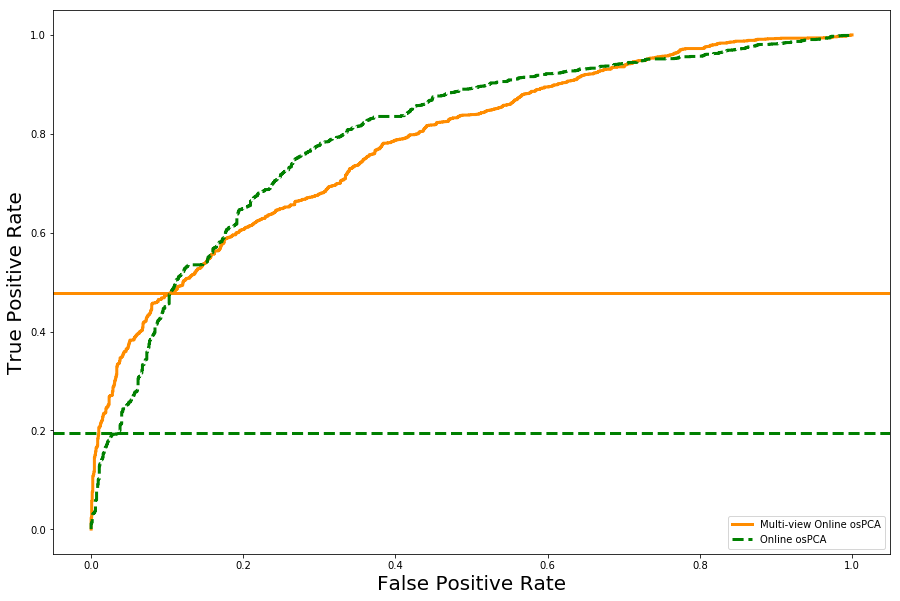

Scaling to N01
tpr:  0.1395477109762824 , fpr:  0.05164992826398852
Auc whole:  0.7136643055376403
----------------------------------
[array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 22, 23, 26, 32, 37, 40, 43, 44, 46, 47, 50, 51, 53]), array([52, 54, 55, 56]), array([24, 25, 27, 29, 30, 31, 33, 34, 35, 39, 49]), array([36, 38, 42]), array([ 4, 11, 28, 41, 45]), array([21, 48])]


 23%|██▎       | 734/3207 [00:00<00:00, 7338.83it/s]

[3.62663443e-01 1.38361415e-02 9.91096175e-03 1.86677315e-02
 1.66614086e-01 6.22745845e-06]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 7296.70it/s]


tpr:  0.38279095421952564 , fpr:  0.07604017216642754
Find intersection
[37]
[]
[]
[]
[ 4 28 41]
[]
ComLen
[1. 0. 0. 0. 3. 0.]
pick
[ 4 28 41]
------------------------
[]
[]
[24 25 27 29 30 31 33 34 35 39 49]
[]
[]
[]
ComLen
[ 0.  0. 11.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39 49]
------------------------
[ 1  2  3  5  6  7  8  9 12 13 14 15 16 17 18 19 22 23 26 32 40 43 44 46
 47 50 51 53]
[52]
[]
[36 38 42]
[11 45]
[]
ComLen
[28.  1.  0.  3.  2.  0.]
pick
[ 1  2  3  5  6  7  8  9 12 13 14 15 16 17 18 19 22 23 26 32 40 43 44 46
 47 50 51 53]
------------------------
[ 0 10 20]
[]
[]
[]
[]
[]
ComLen
[3. 0. 0. 0. 0. 0.]
pick
[ 0 10 20]
------------------------
[]
[]
[]
[]
[]
[21 48]
ComLen
[0. 0. 0. 0. 0. 2.]
pick
[21 48]
------------------------
[]
[54 55 56]
[]
[]
[]
[]
ComLen
[0. 3. 0. 0. 0. 0.]
pick
[54 55 56]
------------------------
########################
Auc clusters:  0.7513690380568839


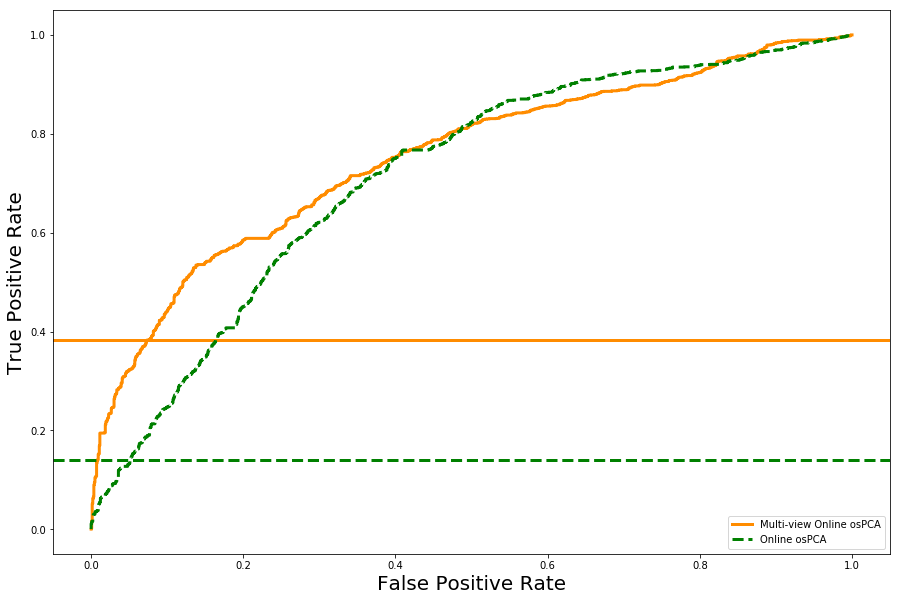

Scaling to N01
tpr:  0.21125206839492552 , fpr:  0.06527977044476327
Auc whole:  0.7543120742034454
----------------------------------
[array([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       22, 23, 26, 32, 36, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53]), array([24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 39, 49]), array([54, 55, 56]), array([ 0, 10, 20]), array([ 4, 37, 41]), array([21, 48])]


 43%|████▎     | 1366/3207 [00:00<00:00, 6823.89it/s]

[3.95015141e-01 6.70735888e-03 1.00462214e-02 1.85549838e-02
 1.27350907e-02 1.04794453e-05]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 7292.44it/s]


tpr:  0.5537782680639823 , fpr:  0.12051649928263988
Find intersection
[]
[28]
[]
[]
[ 4 41]
[]
ComLen
[0. 1. 0. 0. 2. 0.]
pick
[ 4 41]
------------------------
[]
[24 25 27 29 30 31 33 34 35 39 49]
[]
[]
[]
[]
ComLen
[ 0. 11.  0.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39 49]
------------------------
[ 1  2  3  5  6  7  8  9 12 13 14 15 16 17 18 19 22 23 26 32 40 43 44 46
 47 50 51 53]
[]
[]
[]
[]
[]
ComLen
[28.  0.  0.  0.  0.  0.]
pick
[ 1  2  3  5  6  7  8  9 12 13 14 15 16 17 18 19 22 23 26 32 40 43 44 46
 47 50 51 53]
------------------------
[]
[]
[]
[ 0 10 20]
[]
[]
ComLen
[0. 0. 0. 3. 0. 0.]
pick
[ 0 10 20]
------------------------
[]
[]
[]
[]
[]
[21 48]
ComLen
[0. 0. 0. 0. 0. 2.]
pick
[21 48]
------------------------
[]
[]
[54 55 56]
[]
[]
[]
ComLen
[0. 0. 3. 0. 0. 0.]
pick
[54 55 56]
------------------------
########################
Auc clusters:  0.7960416203396323


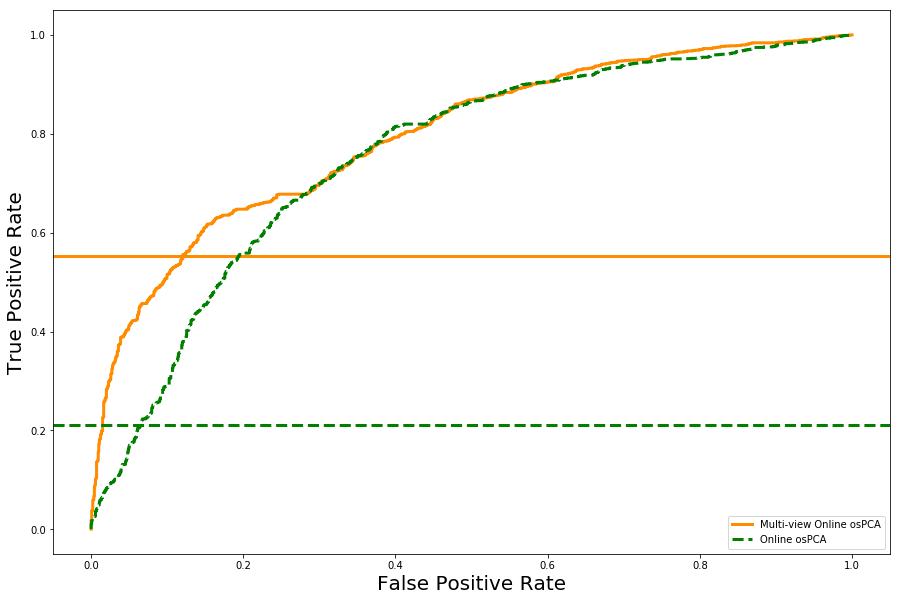

Scaling to N01
tpr:  0.34473248758963043 , fpr:  0.05810616929698709
Auc whole:  0.8064850857943705
----------------------------------
[array([24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 39, 49]), array([ 0, 10, 20]), array([54, 55, 56]), array([21, 48]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18, 19,
       22, 23, 26, 32, 37, 40, 41, 43, 44, 45, 46, 47, 50, 51, 52, 53]), array([14, 36, 38, 42])]


 28%|██▊       | 889/3207 [00:00<00:00, 8885.39it/s]

[7.22166765e-03 1.31949603e-02 7.55325272e-03 2.13385131e-05
 2.89159804e-01 2.72392899e-02]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 8566.22it/s]


tpr:  0.6309983452840596 , fpr:  0.14705882352941177
Find intersection
[]
[]
[]
[]
[ 4 41]
[]
ComLen
[0. 0. 0. 0. 2. 0.]
pick
[ 4 41]
------------------------
[24 25 27 29 30 31 33 34 35 39 49]
[]
[]
[]
[]
[]
ComLen
[11.  0.  0.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39 49]
------------------------
[]
[]
[]
[]
[ 1  2  3  5  6  7  8  9 12 13 15 16 17 18 19 22 23 26 32 40 43 44 46 47
 50 51 53]
[14]
ComLen
[ 0.  0.  0.  0. 27.  1.]
pick
[ 1  2  3  5  6  7  8  9 12 13 15 16 17 18 19 22 23 26 32 40 43 44 46 47
 50 51 53]
------------------------
[]
[ 0 10 20]
[]
[]
[]
[]
ComLen
[0. 3. 0. 0. 0. 0.]
pick
[ 0 10 20]
------------------------
[]
[]
[]
[21 48]
[]
[]
ComLen
[0. 0. 0. 2. 0. 0.]
pick
[21 48]
------------------------
[]
[]
[54 55 56]
[]
[]
[]
ComLen
[0. 0. 3. 0. 0. 0.]
pick
[54 55 56]
------------------------
########################
Auc clusters:  0.8177851892240086


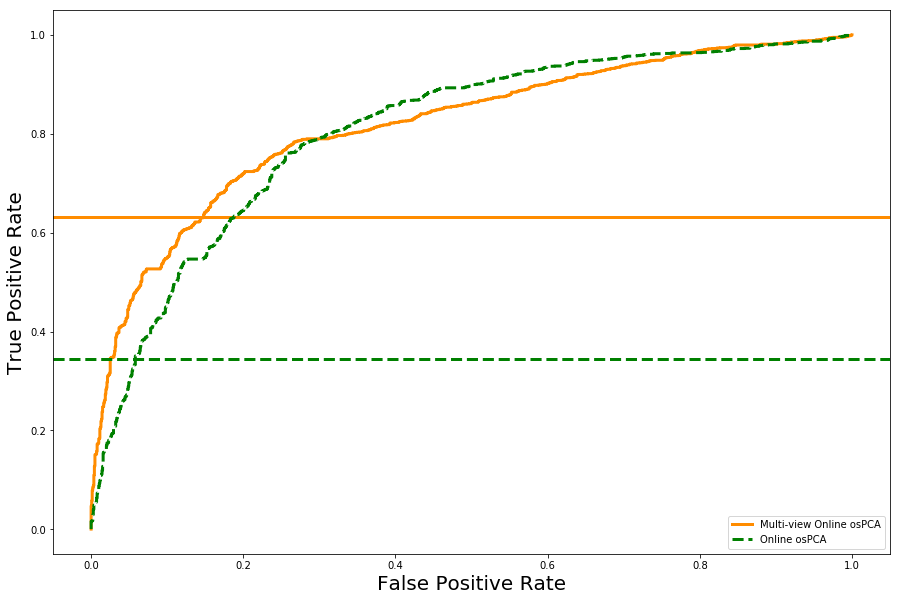

Scaling to N01
tpr:  0.7744070601213459 , fpr:  0.5659971305595409
Auc whole:  0.6853964393931601
----------------------------------
[array([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       22, 23, 26, 32, 36, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53,
       56]), array([24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 39, 49]), array([ 0, 10, 20]), array([21, 48]), array([54, 55]), array([ 4, 37, 41])]


 21%|██        | 665/3207 [00:00<00:00, 6644.81it/s]

[3.18324196e-01 7.52533931e-03 1.37792343e-02 1.66604590e-05
 3.26881034e-04 6.74545934e-03]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 6710.62it/s]


tpr:  0.6050744622173193 , fpr:  0.12195121951219512
Find intersection
[]
[]
[]
[]
[]
[ 4 41]
ComLen
[0. 0. 0. 0. 0. 2.]
pick
[ 4 41]
------------------------
[]
[24 25 27 29 30 31 33 34 35 39 49]
[]
[]
[]
[]
ComLen
[ 0. 11.  0.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39 49]
------------------------
[ 1  2  3  5  6  7  8  9 12 13 15 16 17 18 19 22 23 26 32 40 43 44 46 47
 50 51 53]
[]
[]
[]
[]
[]
ComLen
[27.  0.  0.  0.  0.  0.]
pick
[ 1  2  3  5  6  7  8  9 12 13 15 16 17 18 19 22 23 26 32 40 43 44 46 47
 50 51 53]
------------------------
[]
[]
[ 0 10 20]
[]
[]
[]
ComLen
[0. 0. 3. 0. 0. 0.]
pick
[ 0 10 20]
------------------------
[]
[]
[]
[21 48]
[]
[]
ComLen
[0. 0. 0. 2. 0. 0.]
pick
[21 48]
------------------------
[56]
[]
[]
[]
[54 55]
[]
ComLen
[1. 0. 0. 0. 2. 0.]
pick
[54 55]
------------------------
########################
Auc clusters:  0.8102546885596691


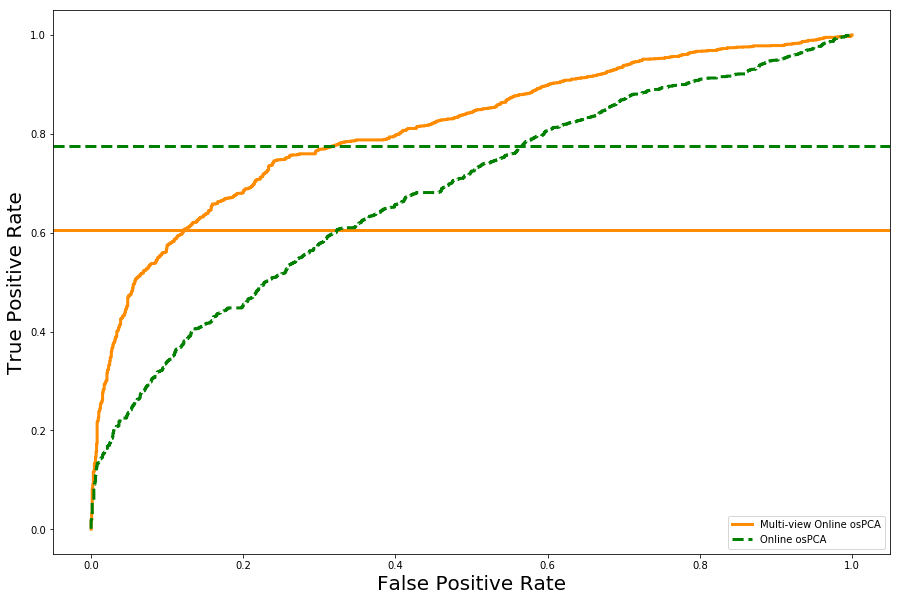

For whole dataset: 
Auc:  0.7512904964226956 +- 0.04661714138431942
Tpr:  0.33314947600661887 +- 0.2306710686620139
Fpr:  0.1550932568149211 +- 0.20570576162794843
For Laplacian: 
Average threshold: 
[0.21974531 0.01108628 0.08464913 0.0114864  0.09376813 0.00859665]
threshold in order: 
[0.00859665 0.01108628 0.0114864  0.08464913 0.09376813 0.21974531]
Auc:  0.791140028852675 +- 0.023663023304086955
Tpr:  0.5301709873138444 +- 0.09028234230399508
Fpr:  0.11406025824964132 +- 0.023346738142677754
Fine clusters: 
[array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5])]
Common clusters: 
[ 4 41]
[24 25 27 29 30 31 33 34 35 39 49]
[ 1  2  3  5  6  7  8  9 12 13 15 16 17 18 19 22 23 26 32 40 43 44 46 47
 50 51 53]
[ 0 10 20]
[21 48]
[54 55]
Total  47 elements


In [36]:
## tune only ospca to see if scaled data is better
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                            UPDATE=UPDATE, NOR_RAN=NOR_RAN,
                            SCALE=SCALE,SCTYPE=SCTYPE)


## N trails experiments, model: online PCA, multi-view PCA, LOF, ABOD

Scaling to N01
tpr:  0.4489795918367347 , fpr:  0.08895265423242468
Auc whole:  0.810809623783594
----------------------------------
[array([ 0, 10, 20]), array([24, 25, 27, 29, 30, 31, 33, 34, 35, 39, 49]), array([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       22, 23, 26, 32, 36, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53]), array([21, 48]), array([ 4, 28, 37, 41]), array([54, 55, 56])]


 42%|████▏     | 1350/3207 [00:00<00:00, 6746.15it/s]

[1.88262082e-02 1.84668296e-02 3.57672520e-01 1.68464676e-05
 1.54469121e-02 8.69514740e-03]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 6428.69it/s]


tpr:  0.6298952013237727 , fpr:  0.19368723098995697
Auc clusters:  0.7741403746732708
Auc Lof:  0.6195696472392516


/usr/bin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/bin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning:

invalid value encountered in true_divide

/usr/bin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars

/usr/bin/anaconda3/lib/python3.6/site-packages/pyod/models/base.py:461: RuntimeWarning:

invalid value encountered in greater

/usr/bin/anaconda3/lib/python3.6/site-packages/pyod/models/base.py:292: RuntimeWarning:

invalid value encountered in greater



Auc Abod:  0.733999070953365


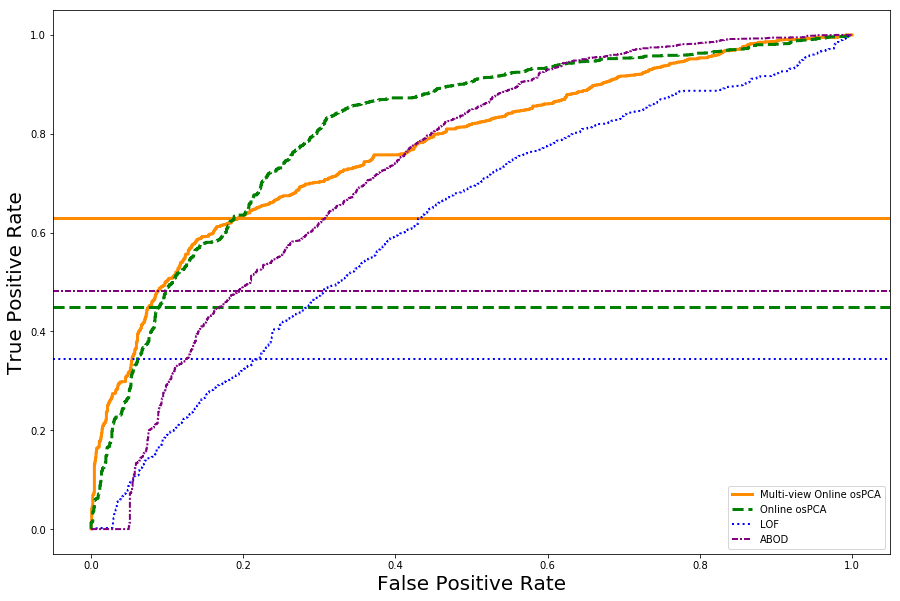

Scaling to N01
tpr:  0.26640926640926643 , fpr:  0.05667144906743185
Auc whole:  0.7920828845710993
----------------------------------
[array([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 19, 22,
       23, 26, 32, 36, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 53]), array([52, 54, 55, 56]), array([24, 25, 27, 29, 30, 31, 33, 34, 35, 39, 49]), array([21, 48]), array([ 4, 28, 37, 41]), array([ 0, 10, 18, 20])]


 17%|█▋        | 561/3207 [00:00<00:00, 5604.63it/s]

[3.01547686e-01 1.18195288e-02 1.16295022e-02 6.11291543e-06
 9.97445644e-03 2.77406286e-02]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 5794.81it/s]


tpr:  0.6685052399338114 , fpr:  0.15351506456241032
Find intersection
[]
[]
[]
[]
[]
[ 0 10 20]
ComLen
[0. 0. 0. 0. 0. 3.]
pick
[ 0 10 20]
------------------------
[]
[]
[24 25 27 29 30 31 33 34 35 39 49]
[]
[]
[]
ComLen
[ 0.  0. 11.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39 49]
------------------------
[ 1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 19 22 23 26 32 36 38 40 42
 43 44 45 46 47 50 51 53]
[52]
[]
[]
[]
[18]
ComLen
[32.  1.  0.  0.  0.  1.]
pick
[ 1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 19 22 23 26 32 36 38 40 42
 43 44 45 46 47 50 51 53]
------------------------
[]
[]
[]
[21 48]
[]
[]
ComLen
[0. 0. 0. 2. 0. 0.]
pick
[21 48]
------------------------
[]
[]
[]
[]
[ 4 28 37 41]
[]
ComLen
[0. 0. 0. 0. 4. 0.]
pick
[ 4 28 37 41]
------------------------
[]
[54 55 56]
[]
[]
[]
[]
ComLen
[0. 3. 0. 0. 0. 0.]
pick
[54 55 56]
------------------------
########################
Auc clusters:  0.8409575432018556
Auc Lof:  0.6066832797720275
Auc Abod:  0.7419602646595883


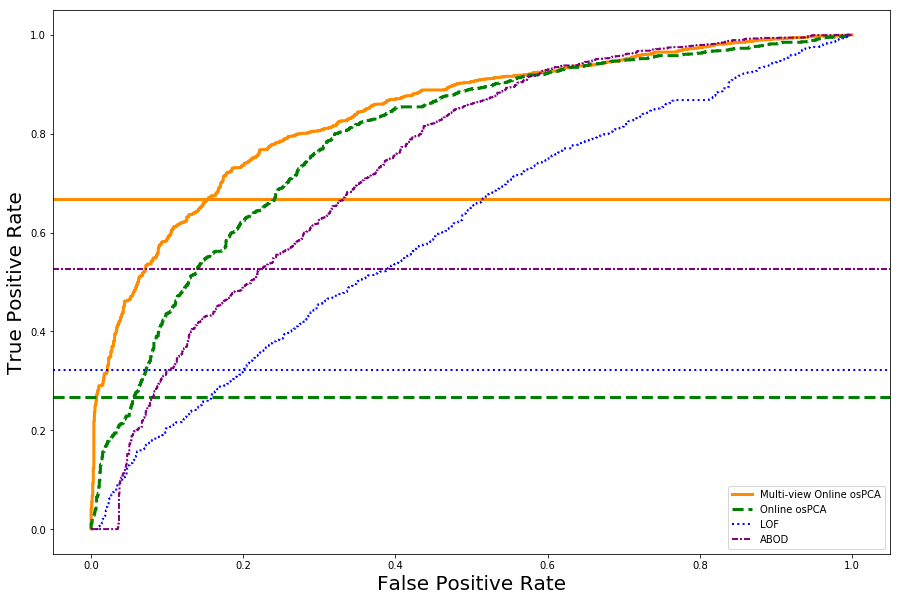

Scaling to N01
tpr:  0.419746276889134 , fpr:  0.06097560975609756
Auc whole:  0.8282152017036215
----------------------------------
[array([24, 25, 27, 29, 30, 31, 33, 34, 35, 39, 49]), array([ 0, 10, 20]), array([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       22, 23, 26, 32, 36, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53,
       56]), array([21, 48]), array([54, 55]), array([ 4, 28, 37, 41])]


 36%|███▋      | 1167/3207 [00:00<00:00, 5810.32it/s]

[7.85270912e-03 2.13535646e-02 4.20872886e-01 2.65247078e-05
 3.32057052e-04 2.23506060e-02]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 5823.58it/s]


tpr:  0.604522890237176 , fpr:  0.1054519368723099
Find intersection
[]
[ 0 10 20]
[]
[]
[]
[]
ComLen
[0. 3. 0. 0. 0. 0.]
pick
[ 0 10 20]
------------------------
[24 25 27 29 30 31 33 34 35 39 49]
[]
[]
[]
[]
[]
ComLen
[11.  0.  0.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39 49]
------------------------
[]
[]
[ 1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 19 22 23 26 32 36 38 40 42
 43 44 45 46 47 50 51 53]
[]
[]
[]
ComLen
[ 0.  0. 32.  0.  0.  0.]
pick
[ 1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 19 22 23 26 32 36 38 40 42
 43 44 45 46 47 50 51 53]
------------------------
[]
[]
[]
[21 48]
[]
[]
ComLen
[0. 0. 0. 2. 0. 0.]
pick
[21 48]
------------------------
[]
[]
[]
[]
[]
[ 4 28 37 41]
ComLen
[0. 0. 0. 0. 0. 4.]
pick
[ 4 28 37 41]
------------------------
[]
[]
[56]
[]
[54 55]
[]
ComLen
[0. 0. 1. 0. 2. 0.]
pick
[54 55]
------------------------
########################
Auc clusters:  0.8379650475879211
Auc Lof:  0.6026420456119166
Auc Abod:  0.7380027159182725


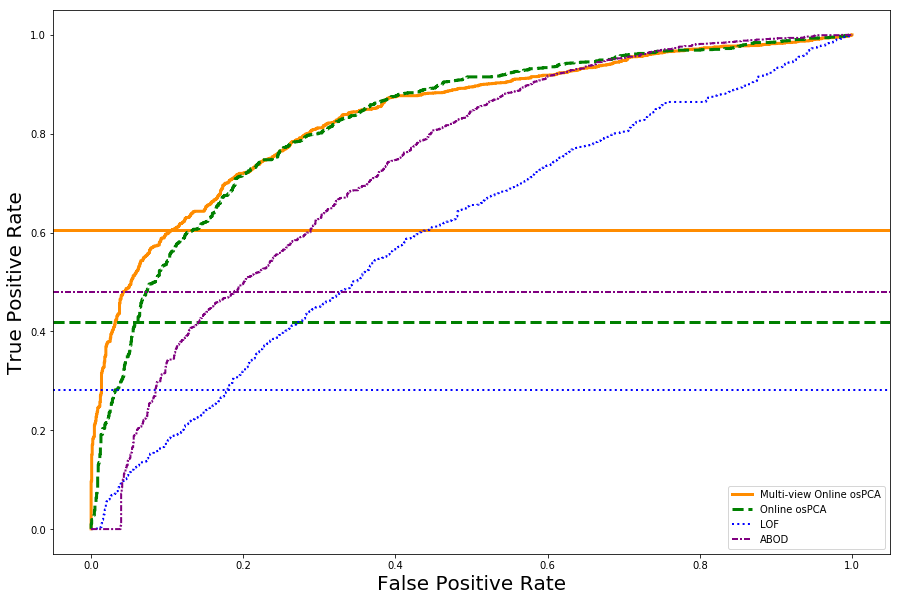

Scaling to N01
tpr:  0.21787093215664644 , fpr:  0.04806312769010043
Auc whole:  0.7868575907620794
----------------------------------
[array([ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 19, 22,
       23, 26, 32, 36, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53]), array([24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 39]), array([52, 54, 55, 56]), array([21, 48]), array([ 4, 37, 41]), array([ 0, 10, 18, 20])]


 35%|███▍      | 1116/3207 [00:00<00:00, 5576.20it/s]

[2.98165528e-01 6.33962021e-03 1.73135875e-02 1.53214457e-06
 8.64836013e-03 4.41190811e-02]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 5751.37it/s]


tpr:  0.6552675124103695 , fpr:  0.15853658536585366
Find intersection
[]
[]
[]
[]
[]
[ 0 10 20]
ComLen
[0. 0. 0. 0. 0. 3.]
pick
[ 0 10 20]
------------------------
[49]
[24 25 27 29 30 31 33 34 35 39]
[]
[]
[]
[]
ComLen
[ 1. 10.  0.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39]
------------------------
[ 1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 19 22 23 26 32 36 38 40 42
 43 44 45 46 47 50 51 53]
[]
[]
[]
[]
[]
ComLen
[32.  0.  0.  0.  0.  0.]
pick
[ 1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 19 22 23 26 32 36 38 40 42
 43 44 45 46 47 50 51 53]
------------------------
[]
[]
[]
[21 48]
[]
[]
ComLen
[0. 0. 0. 2. 0. 0.]
pick
[21 48]
------------------------
[]
[28]
[]
[]
[ 4 37 41]
[]
ComLen
[0. 1. 0. 0. 3. 0.]
pick
[ 4 37 41]
------------------------
[]
[]
[54 55]
[]
[]
[]
ComLen
[0. 0. 2. 0. 0. 0.]
pick
[54 55]
------------------------
########################
Auc clusters:  0.8207911378130686
Auc Lof:  0.6175222231278801
Auc Abod:  0.7422348636224431


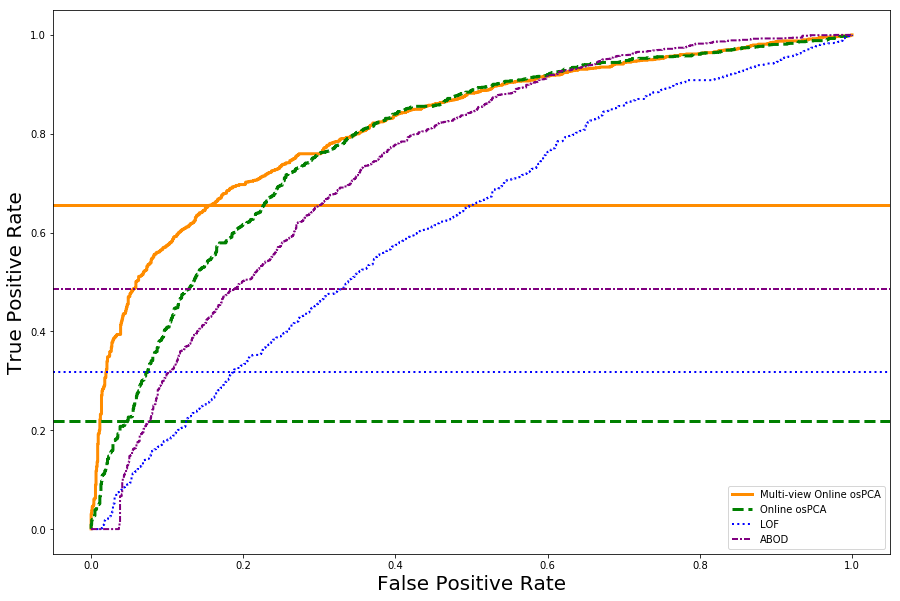

Scaling to N01
tpr:  0.3353557639271925 , fpr:  0.10114777618364419
Auc whole:  0.7275639985724021
----------------------------------
[array([ 1,  2,  3,  4,  5,  8,  9, 11, 12, 13, 15, 16, 17, 18, 19, 22, 23,
       26, 37, 40, 41, 43, 44, 45, 46, 47, 51, 53]), array([24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 39, 49]), array([ 6,  7, 52, 54, 55, 56]), array([21, 48]), array([ 0, 10, 20]), array([14, 32, 36, 38, 42, 50])]


 41%|████      | 1307/3207 [00:00<00:00, 6525.19it/s]

[3.47339150e-01 7.60955777e-03 1.72320516e-02 8.32060513e-06
 1.41295700e-02 6.19408279e-02]
Fine Clusters:  [0 1 2 3 4 5]
Not update


100%|██████████| 3207/3207 [00:00<00:00, 6014.19it/s]


tpr:  0.628792057363486 , fpr:  0.10258249641319943
Find intersection
[]
[]
[]
[]
[ 0 10 20]
[]
ComLen
[0. 0. 0. 0. 3. 0.]
pick
[ 0 10 20]
------------------------
[]
[24 25 27 29 30 31 33 34 35 39]
[]
[]
[]
[]
ComLen
[ 0. 10.  0.  0.  0.  0.]
pick
[24 25 27 29 30 31 33 34 35 39]
------------------------
[ 1  2  3  5  8  9 11 12 13 15 16 17 19 22 23 26 40 43 44 45 46 47 51 53]
[]
[6 7]
[]
[]
[14 32 36 38 42 50]
ComLen
[24.  0.  2.  0.  0.  6.]
pick
[ 1  2  3  5  8  9 11 12 13 15 16 17 19 22 23 26 40 43 44 45 46 47 51 53]
------------------------
[]
[]
[]
[21 48]
[]
[]
ComLen
[0. 0. 0. 2. 0. 0.]
pick
[21 48]
------------------------
[ 4 37 41]
[]
[]
[]
[]
[]
ComLen
[3. 0. 0. 0. 0. 0.]
pick
[ 4 37 41]
------------------------
[]
[]
[54 55]
[]
[]
[]
ComLen
[0. 0. 2. 0. 0. 0.]
pick
[54 55]
------------------------
########################
Auc clusters:  0.8470236479562161
Auc Lof:  0.6028875624079559
Auc Abod:  0.7310415926423304


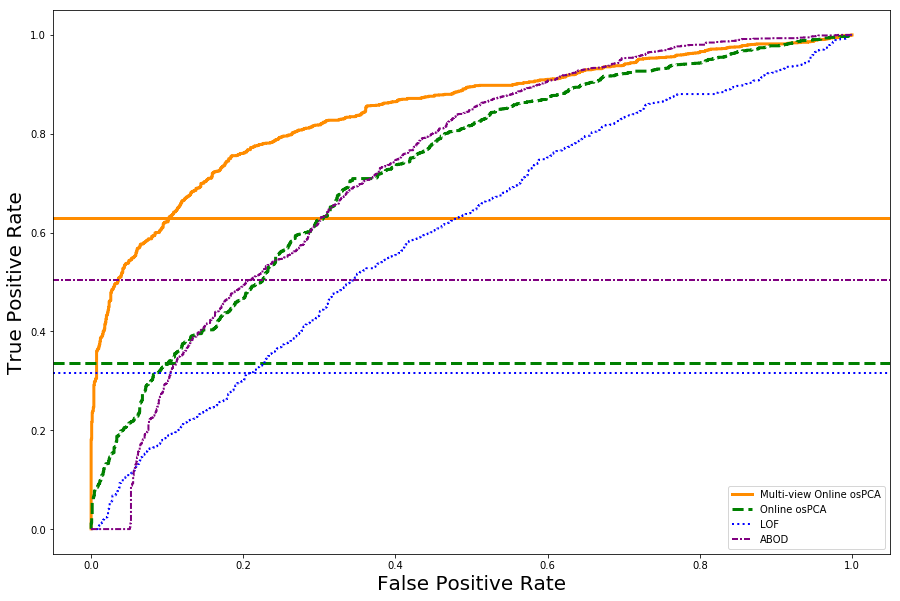

For whole dataset: 
Auc:  0.7891058598785592 +- 0.034064386296252136
Tpr:  0.3376723662437948 +- 0.0878198211470205
Fpr:  0.07116212338593973 +- 0.02031231481538547
For Laplacian: 
Average threshold: 
[1.94746256e-01 1.31178202e-02 1.64944109e-01 1.18673681e-05
 9.70627115e-03 3.29692582e-02]
threshold in order: 
[1.18673681e-05 9.70627115e-03 1.31178202e-02 3.29692582e-02
 1.64944109e-01 1.94746256e-01]
Auc:  0.8241755502464663 +- 0.026490730966127893
Tpr:  0.6373965802537231 +- 0.022352212054122772
Fpr:  0.14275466284074606 +- 0.03453774208668787
Fine clusters: 
[array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5])]
For Lof: 
Auc:  0.6098609516318063 +- 0.0072635006873314435
Tpr:  0.3164920022062879 +- 0.01966383118743764
Fpr:  0.19928263988522238 +- 0.01498166712448391
For Abod: 
Auc:  0.7374477015591999 +- 0.004393619733290868
Tpr:  0.49542195256480975 +- 0.01777876582711083
Fpr:  0.1637015781922525 +-

In [240]:
aucWhole, tprWhole, fprWhole, aucLap, tprLap, fprLap, thresDescend = ospca.nTrail_Whole_Laplacian_full(currentData, y_Series,
                           sRateW, ini_For_W, dropRateT_W,
                           sRateClus, ini_For_Clus, dropRateT_Clus,
                           k, thresLowBDD, strategy,
                           n_abod, contami_abod,
                           n_lof, contami_lof,
                           Name=pStr,
                           NTRAIL=NTRAIL,
                           thresUpBDD=thresUpBDD,
                           RANDOMPICK=False,
                           UPDATE=UPDATE, NOR_RAN=NOR_RAN,
                           SCALE=SCALE,SCTYPE=SCTYPE)

In [241]:
# test quick functions
ospca.quickAucTprFpr(Name=pStr)

For whole dataset: 
Auc:  0.7891058598785594 +- 0.03406438629625215
Tpr:  0.3376723662437948 +- 0.08781982114702049
Fpr:  0.07116212338593975 +- 0.020312314815385472
For Laplacian: 
Auc:  0.8241755502464663 +- 0.026490730966127893
Tpr:  0.6373965802537231 +- 0.02235221205412274
Fpr:  0.14275466284074606 +- 0.03453774208668786
For Lof: 
Auc:  0.6098609516318063 +- 0.0072635006873314435
Tpr:  0.3164920022062879 +- 0.01966383118743764
Fpr:  0.19928263988522238 +- 0.014981667124483915
For Abod: 
Auc:  0.7374477015591999 +- 0.004393619733290885
Tpr:  0.4954219525648097 +- 0.017778765827110833
Fpr:  0.1637015781922525 +- 0.01418415241315704


In [242]:
## test quick functions

ospca.readCommonClus(Name=pStr)
#ospca.quick_ROC_plot(Name=pStr, NTRAIL=5)

[ 0. 10. 20.]
[24. 25. 27. 29. 30. 31. 33. 34. 35. 39.]
[ 1.  2.  3.  5.  8.  9. 11. 12. 13. 15. 16. 17. 19. 22. 23. 26. 40. 43.
 44. 45. 46. 47. 51. 53.]
[21. 48.]
[ 4. 37. 41.]
[54. 55.]


[array([ 0., 10., 20.]),
 array([24., 25., 27., 29., 30., 31., 33., 34., 35., 39.]),
 array([ 1.,  2.,  3.,  5.,  8.,  9., 11., 12., 13., 15., 16., 17., 19.,
        22., 23., 26., 40., 43., 44., 45., 46., 47., 51., 53.]),
 array([21., 48.]),
 array([ 4., 37., 41.]),
 array([54., 55.])]

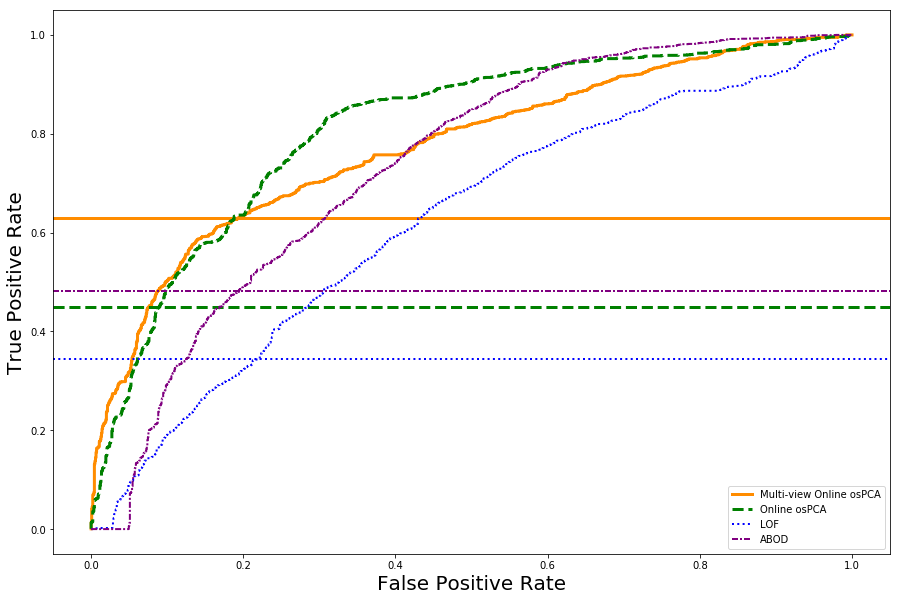

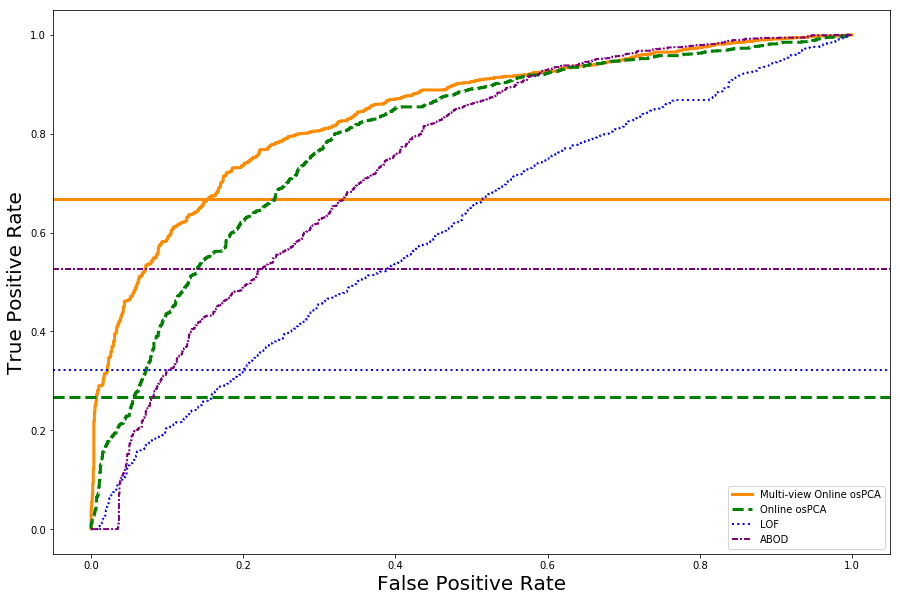

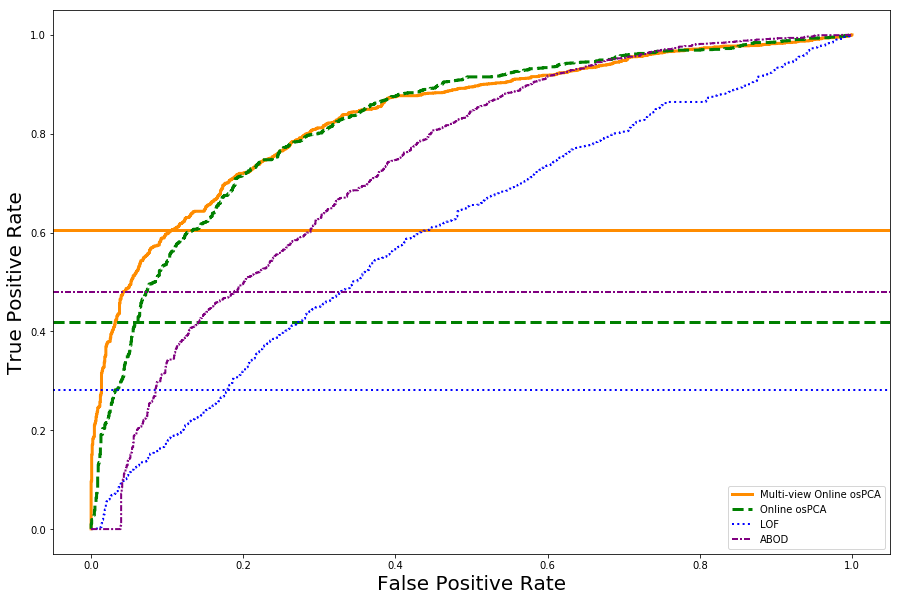

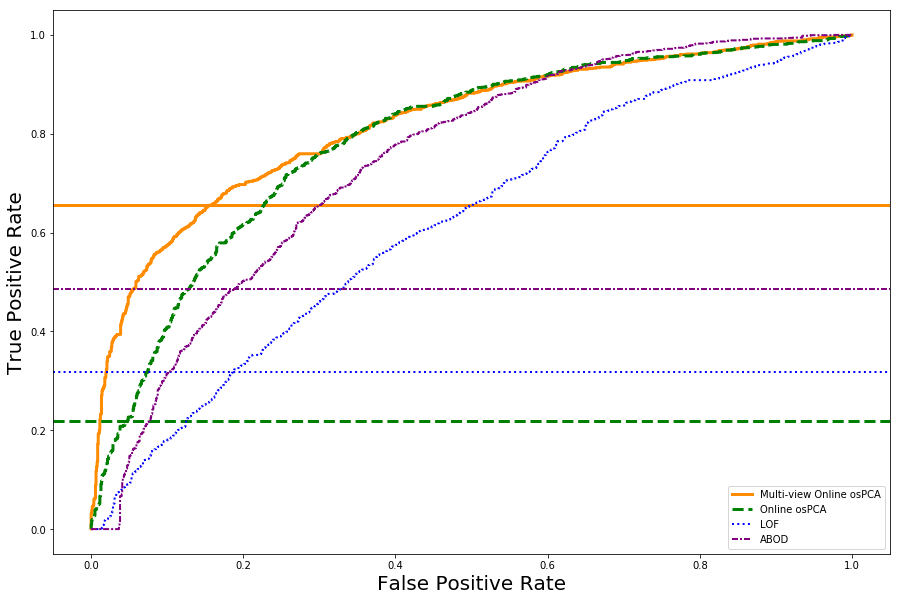

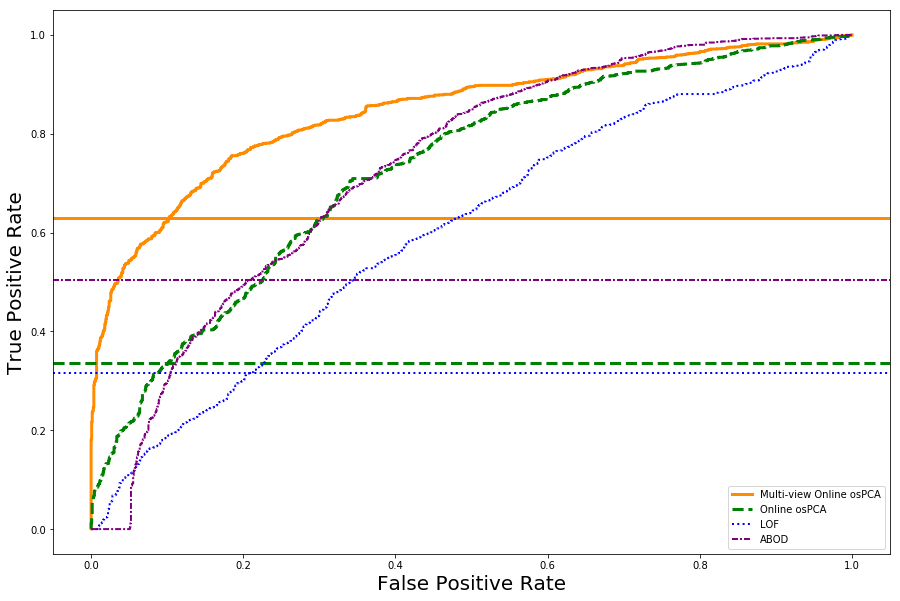

In [243]:
ospca.quick_ROC_plot(Name=pStr, NTRAIL=5)